/home/dronelab/delaunay_rasterization


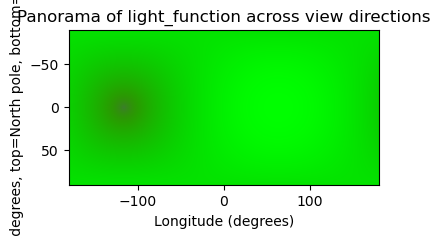

In [5]:
import torch
import plotly.graph_objects as go
import math

import os
VERSION = 9
if VERSION is not None:
    os.environ["CC"] = f"/usr/bin/gcc-{VERSION}"
    os.environ["CXX"] = f"/usr/bin/g++-{VERSION}"
from pathlib import Path
import sys
sys.path.append(str(Path(os.path.abspath('')).parent))
print(str(Path(os.path.abspath('')).parent))

from models.ingp_color import *
import matplotlib.pyplot as plt

"""
Creates a 2D latitude-longitude grid of directions (view_dirs),
evaluates light_function, and displays the result as a panorama.
"""

# Fix constants
base_color      = torch.tensor([[1.0, 1.0, 1.0]])   # White base color
reflection_dirs = l2_normalize_th(torch.tensor([[[1.0, 2.0, 0.0], [0.0, 1.0, 1.0]]]))
light_colors    = torch.tensor([[[0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]])   # White light
light_roughness = torch.tensor([[[-10.05], [1.3]]])            # Arbitrary roughness

# Fix constants
base_color      = torch.tensor([[1.0, 1.0, 1.0]])   # White base color
reflection_dirs = l2_normalize_th(torch.tensor([[[1.0, 2.0, 0.0]]]))
light_colors    = torch.tensor([[[0.0, 1.0, 0.0]]])   # White light
light_roughness = torch.tensor([[[4.05]]])            # Arbitrary roughness
base_color = torch.tensor([[0.1538, 0.8039,  0.0186]])
light_colors = torch.tensor([[[-0.9054,  1.3884, -2.6332]]])
light_roughness = torch.tensor([[[0.3535]]])

width  = 400
height = 200

phi_vals   = torch.linspace(-np.pi, np.pi, width)
theta_vals = torch.linspace(0, np.pi, height)

p, t = torch.meshgrid(phi_vals, theta_vals, indexing='xy')
view_dirs = torch.stack([
    torch.sin(t) * torch.cos(p),
    torch.sin(t) * torch.sin(p),
    torch.cos(t)
], dim=-1)
results = light_function(base_color, 
                            reflection_dirs, 
                            light_colors, 
                            light_roughness, 
                            view_dirs.reshape(-1, 1, 3))
results_2d = results.reshape(height, width, 3).numpy()
results_2d = results_2d / results_2d.max()

# Plot using matplotlib
plt.figure(figsize=(4, 4))
plt.imshow(results_2d, origin='upper', extent=(-180, 180, 90, -90))
plt.title('Panorama of light_function across view directions')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees, top=North pole, bottom=South pole)')
plt.axis('on')
plt.show()